# 0. Background information

Minecraft is a video game played by a wide range of people. PLAI, a computer science research group at UBC, aims to collect data about the ways in which individuals play Minecraft by recording their in-game actions. This report seeks to assist PLAI with their recruitment efforts in order to ensure it is optimally targeted. Thus, PLAI has provided us with a dataset collected through an online survey, which contains the name, experience, email, playtime, gender, and age of players. Starting from a broad initial question, we conducted exploratory analysis to narrow it to a specific research question that we hope will yield insightful results that can help PLAI optimally recruit players for their research.

# 1. Data Description

## 1.1 Dataset Overview
In this project, I am working with the file **players.csv**, which contains one row per unique player and several demographic and gameplay-related features.

- **Number of observations:** 196
- **Number of variables:** 7

## 1.2 Variable Summary Table

| Variable       | Type      | Description | Missing | Unique Values |
|----------------|-----------|-------------|---------|---------------|
| experience     | categorical | Player’s self-reported gaming experience | 0 | 5 |
| subscribe      | boolean | Whether the player subscribed to the newsletter | 0 | 2 |
| hashedEmail    | identifier | Unique hashed player ID | 0 | 196 |
| played_hours   | numeric | Total hours played on the server | 0 | 43 |
| name           | text | Player name | 0 | 196 |
| gender         | categorical | Gender identity | 0 | 7 |
| Age            | numeric | Player age in years | 2 | 32 |


## 1.3 Numeric Summary Statistics

| Variable     |Count | Mean | Std Dev | Min | Median | Max |
|--------------|------|----------|------|--------|------|----|
| played_hours |  196   |    5.85      |    28.36  |   0.00     |  0.10    |  223.1  |
| Age          |  194    |   21.14       |   7.39   |   9.00     |   19.00   |  58  |

## 1.4 Notes and Potential Data Issues
- Age contains 2 missing values.  
- `played_hours` is heavily skewed with a few large outliers. Many players have close to 0 or very small play time.  
- There may be volunteer/self-selection bias in the dataset.  
- `name` contains personal information and should be excluded from all analysis.  
- Small category counts in gender may require grouping.  
- Subscription classes are imbalanced (about 73% subscribed).
- Experience appears to be ordinal and we should preserve this
  
   



## 1.5 Overall summary

The **players.csv** file contains 196 unique players and 7 variables. Key numeric variables are **played_hours** (total play time per player) and **Age** (two missing values). **subscribe** is a boolean indicating newsletter signup (144 True, 52 False). Categorical variables include **experience** (5 levels) and **gender** (7 categories). Computer checks found no duplicate **hashedEmail** identifiers. **played_hours** is highly skewed (mean 5.85 hours, median 0.10 hours, max 223.1). Potential limitations include class imbalance for **subscribe**, small counts in some **gender** categories, and volunteer bias inherent to the data collection method.

# 2. Questions

## 2.1 Broad Question
**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

## 2.2 Specific Question
**Can player demographic attributes (`Age`, `gender`) and gameplay characteristics (`experience`, `played_hours`) predict whether a player subscribes to the game-related newsletter?**

This question is appropriate because `players.csv` contains all required explanatory variables and a clear binary response variable (`subscribe`). This will be a standard classification problem. To apply models seen in class, we will likely need to scale the numeric variables, impute the missing values in the age variable, and encode the categorical variables to numeric form.

# 3. Exploratory Data Analysis (EDA)
## 3.1 Load Data

In [1]:
players <- read_csv("data/players.csv") #use github url
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## 3.2 Basic Data Wrangling

In [2]:
library(tidyverse)

players_tidy <- players |>
  mutate(
    subscribe = as.logical(subscribe),
    gender = as.factor(gender),
    experience = as.factor(experience)
  )

head(players_tidy)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Note: We did not change name to factor as that will likely be dropped


## 3.3 Mean and Summary statistics of Quantitative Variables

In [3]:
players_tidy |>
  summarize(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE)
  )

mean_played_hours,median_played_hours,mean_age,median_age
<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,21.13918,19


## 3.4 Exploratory Visualizations

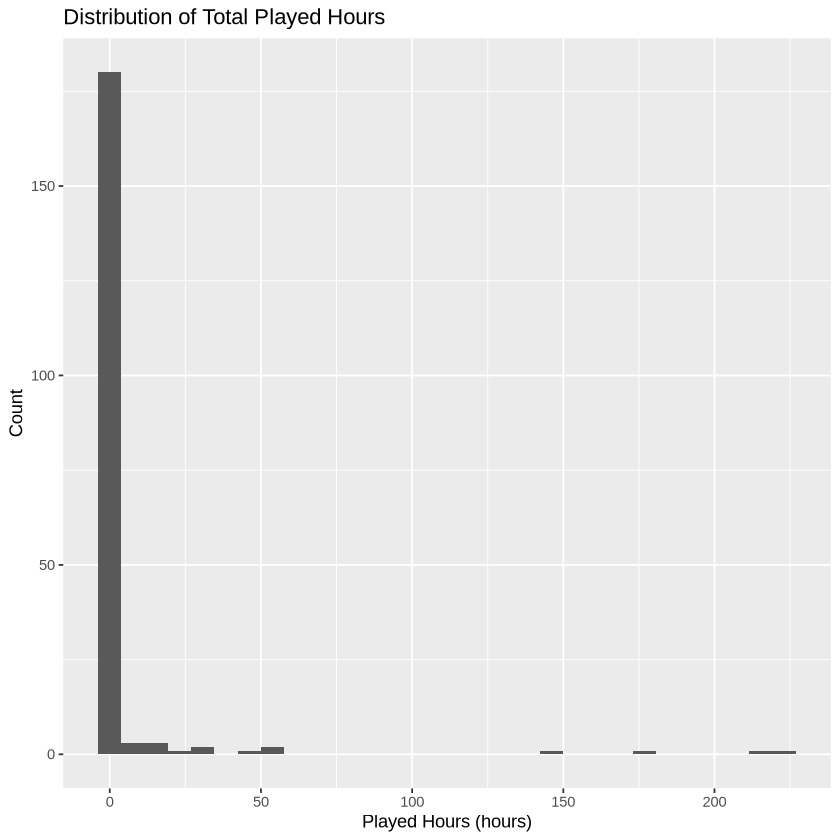

In [4]:
ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Total Played Hours",
       x = "Played Hours (hours)",
       y = "Count")

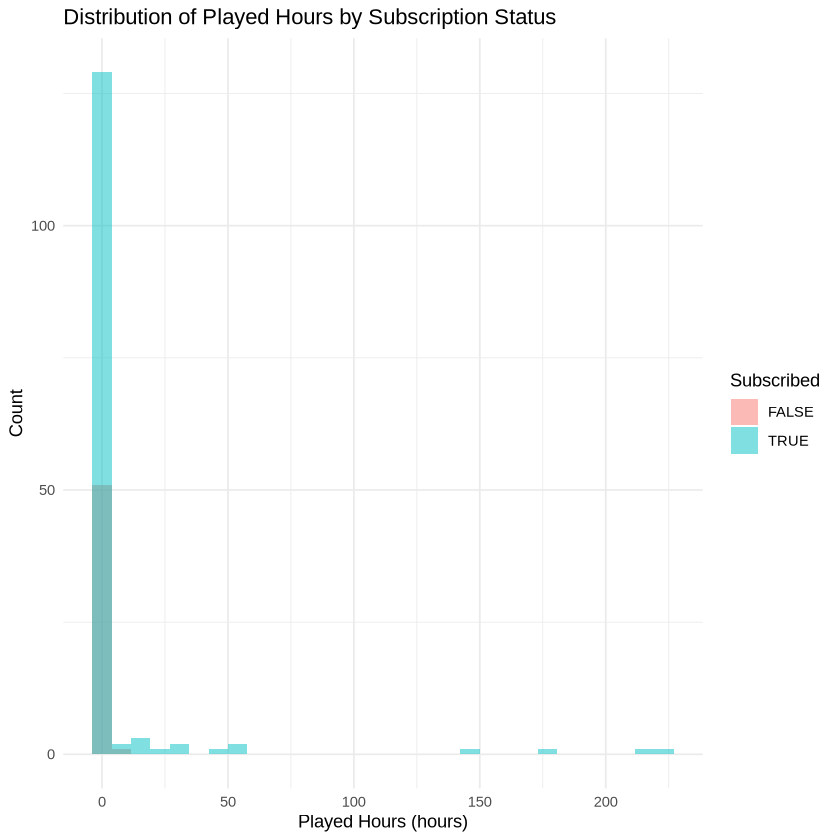

In [5]:
ggplot(players_tidy, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Played Hours (hours)",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


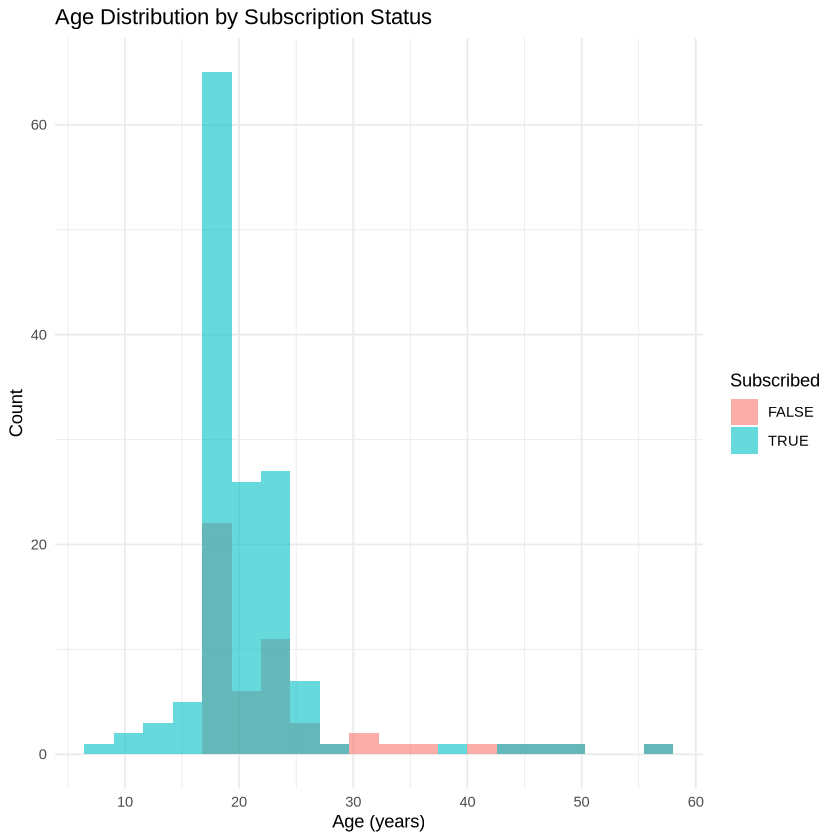

In [6]:
ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 20) +
  labs(title = "Age Distribution by Subscription Status",
       x = "Age (years)",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()


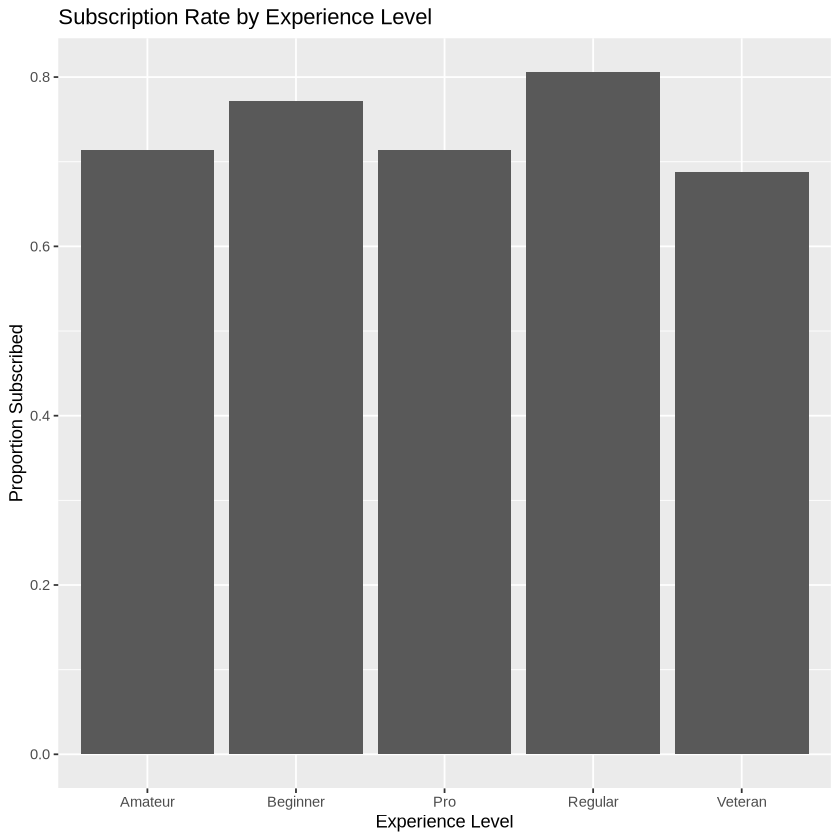

In [7]:
players_tidy |>
  group_by(experience) |>
  summarize(prop_subscribe = mean(subscribe)) |>
  ggplot(aes(x = experience, y = prop_subscribe)) +
  geom_col() +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion Subscribed")


## 3.5 Insights from EDA

- The visualization supports our previous discussion that playing hours are highly skewed, with many low-playtime users and a few players with very large playtimes. Although an interesting trend, we can see with the distribution of played hours by subscription status is that nearly all of the non-subscribed players have playtime around 0, while players with more playtime are almost always subscribed. This trend could be beneficial to our prediction question.
- The age visualization shows that our dataset is dominated by young adults. Looking at the distribution of age by subscription status, we see heavy overlap between the ages of players who are subscribed and non-subscribers. But all young players (age < 16) are subscribers, which could make age a beneficial variable in our prediction question.
- We can see that subscription rates are relatively similar across experience levels (around 0.7). However, this does not mean that the experience level variable is useless in our prediction question, as it could be helpful in conjunction with another variable to a predictive model trying to answer our question.

# 4. Methods and Plan

## 4.1 Proposed Method
I propose using KNN to predict a player's subscription status based on their demographic and gameplay characteristics.

## 4.2 Why This Method is Appropriate
- The problem is a classification problem (cannot use linear regression)
- KNN is a good option because it predicts based on similar data points. From our EDA, we have seen some similarity in the subscription status as some of the variables change. For example, all players with high playtime are subscribers. Another example is that almost all young players are subscribers.
- KNN can handle some of the skewed variables like played_hours, as most players would be far away from the players with outlier playtime. Thus, the outliers would not be able to heavily influence predictions.

## 4.3 Required Assumptions
- Similar points should have similar outcomes.
- Numeric representation of all variables. This is pretty achievable with encoding categorical columns.
- Scaling will be needed for the KNN model to be effective.
- No irrelevant or noisy features.
- The dataset should be reasonably balanced. If one class is far more frequent in the dataset, then it will obviously comprise more neighbors and be predicted more often.

## 4.4 Potential Limitations/Weaknesses
- Class imbalance in subscription status may heavily affect predictive performance.
- Might not be able to capture linear relationships between variables and the target.

## 4.5 Model Evaluation Plan
- Split data into training (70%) and test (30%) sets before any preprocessing or training.
- Perform n-fold cross-validation (n=5 or 10) on the training set, while hyperparameter optimizing k for the KNN model.
- Evaluate the model using precision/recall due to class imbalance.
- Compare the model with a baseline predictor.

